IMPORTACION DE LAS DEPENDENCIAS


In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

PREPROCESAMIENTO

In [45]:
data = pd.read_csv('./diamonds.csv',delimiter=',')


X = data['carat']         
y = data['price']

m = y.size

data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [46]:
print(X)

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64


In [47]:
print(y)

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64


In [48]:
print(data.shape)

(53940, 11)


In [49]:
def plotData(x, y):

    fig = pyplot.figure()  

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Precio del diamante (USD)')
    pyplot.xlabel('Peso del diamante (quilates)')

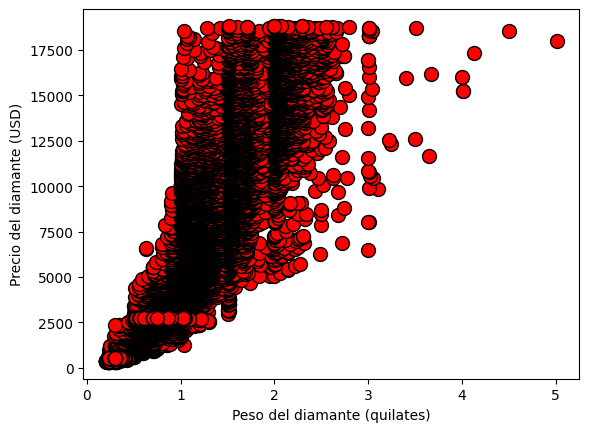

In [50]:
plotData(X, y)

In [51]:
X = np.stack([np.ones(m), X], axis=1)

print(X)

[[1.   0.23]
 [1.   0.21]
 [1.   0.23]
 ...
 [1.   0.7 ]
 [1.   0.86]
 [1.   0.75]]


In [52]:
def calcularCosto(X, y, theta):
   
    m = y.size 
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [53]:
def gradientDescent(X, y, theta, alpha, num_iters):
        
    m = y.shape[0]

    theta = theta.copy()

    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history

In [54]:

theta = np.zeros(2)


iterations = 1700
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print(J_history)

Theta encontrada por descenso gradiente: -1717.9581, 7169.2333
[np.float64(15301556.995148191), np.float64(14925084.899621874), np.float64(14561258.860566689), np.float64(14209645.426308053), np.float64(13869826.024955502), np.float64(13541396.453540977), np.float64(13223966.384696683), np.float64(12917158.890270034), np.float64(12620609.98129421), np.float64(12333968.163752943), np.float64(12056894.009597171), np.float64(11789059.742489927), np.float64(11530148.837773768), np.float64(11279855.636172531), np.float64(11037884.970755769), np.float64(10803951.806710662), np.float64(10577780.893481465), np.float64(10359106.428852182), np.float64(10147671.73456205), np.float64(9943228.94305833), np.float64(9745538.69500352), np.float64(9554369.847168189), np.float64(9369499.190352632), np.float64(9190711.176993078), np.float64(9017797.658120012), np.float64(8850557.629347371), np.float64(8688796.9855828), np.float64(8532328.284159299), np.float64(8380970.516099286), np.float64(8234548.88523

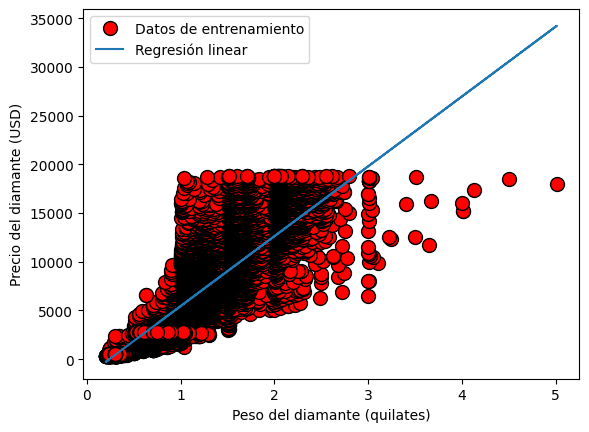

In [55]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear'])

In [56]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
def predict_price(carat):
    return np.dot([1, carat], theta)  # [1, x] · [theta0, theta1]

# Predecir precio para diamantes de 1.5 y 3.0 quilates
predict1 = predict_price(1.5)
predict2 = predict_price(3.0)

print('Para un diamante de 1.50 quilates, se predice un precio de ${:.2f}'.format(predict1))
print('Para un diamante de 3.00 quilates, se predice un precio de ${:.2f}'.format(predict2))

Para un diamante de 1.50 quilates, se predice un precio de $9035.89
Para un diamante de 3.00 quilates, se predice un precio de $19789.74


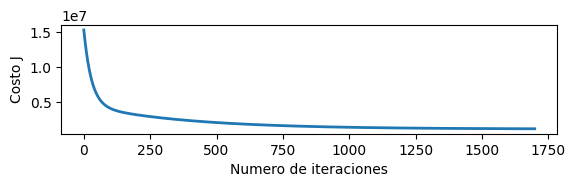

In [57]:



# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass